# TP 1 - Julien PELEGRI & Elouan RAYMOND 

## Charger les données 


In [1]:
import pandas as pd

df = pd.read_excel (r'data_regression.xlsx')
print (df)

   X0    X1    X2     Y
0   1  0.72  0.32  6.93
1   1  0.75  0.12  5.99
2   1  0.53  0.65  1.46
3   1  0.27  0.82  1.44
4   1  0.49  0.15  4.51
5   1  0.02  0.19  1.25
6   1  0.35  0.87  2.53
7   1  0.99  0.71  6.88
8   1  0.98  0.92  6.25
9   1  0.73  0.19  6.36


## Lets rebuild gradient itération step by step to make it clear 

#### Basic tangent function

$$
\hat{y} =  a x + b
$$



In [2]:
def hypothesis(x,a,b):
    y_pred = a*x + b
    return y_pred

In [3]:
import numpy as np

def loss(x,y,a,b):
    y_pred = hypothesis(x,a,b)
    loss = np.sum((y-y_pred) ** 2)
    return loss

### Derivatives

$$
\frac{d\ SSR}{d\ slope}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} )\times x
$$

$$
\frac{d\ SSR}{d\ intercept}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} ) 
$$


In [4]:
def derivatives(x,y,a,b):
    y_pred = hypothesis(x,a,b)
    derivative_a = np.sum(-2*(y-y_pred)*x)
    derivative_b = np.sum(-2*(y-y_pred))
    return derivative_a, derivative_b

$$
step\ size = derivative \times learning\ rate
$$

In [5]:
def steps(derivative_a,derivative_b,learning_rate = 0.01):
    step_a = derivative_a*learning_rate
    step_b = derivative_b*learning_rate
    return step_a, step_b

In [6]:
def parameter_update(a, step_a, b, step_b):
    updated_a = a - step_a
    updated_b = b - step_b
    return updated_a , updated_b

### Consider convergence to be 150 epochs

In [7]:
x = df['X1']
y = df['Y']

In [8]:
# Initialize a and b
a = 1
b = 0
loss_history = []

# Loop through steps to perform Gradient Descent
for epoch in range(150):
    
    # Compute Loss at each Epoch and append to loss_history
    loss_epoch = loss(x,y,a,b)
    loss_history.append(loss_epoch)
    
    # Compute the Derivates 
    derivative_a, derivative_b = derivatives(x,y,a,b)
    
    # Compute Steps
    step_a, step_b = steps(derivative_a,derivative_b,learning_rate = 0.01)
    
    # Compute updated parameters
    updated_a, updated_b = parameter_update(a,step_a,b,step_b)
    
    # Set updated parameters for new epoch
    a = updated_a
    b = updated_b

In [9]:
import matplotlib.pyplot as plt
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

### We have a nice convergence after 15 epochs

----------------------------------------

## 1. Résolution analytique de la regression linéaire multiple
> On rappelle l'estimateur : $$ \hat{a} = (X'X)^{-1}X'Y$$
### 1.1 Sur le fichier de données 

In [10]:
import numpy as np
import numpy.linalg as la
X = df[['X0','X1','X2']]
Y = df['Y']

In [11]:
A = la.inv(np.dot(X.transpose(),X))
B = np.dot(X.transpose(),Y)
a_hat = np.dot(A,B)
print(a_hat)

[ 1.42423013  7.17311794 -2.52258683]


In [12]:
Y_pred1 = np.dot(a_hat,X.transpose())
Y2 = pd.DataFrame(Y_pred1,Y)
Y2.columns = ['Y_pred']
print(Y2)
delta1 = Y-Y_pred1
delta3 = np.power(delta1,2)
n_donnees = len(Y)
MSE = 1/n_donnees*sum(delta3)
print('MSE=',MSE)

        Y_pred
Y             
6.93  5.781647
5.99  6.501358
1.46  3.586301
1.44  1.292451
4.51  4.560670
1.25  1.088401
2.53  1.740171
6.88  6.734580
6.25  6.133106
6.36  6.181315
MSE= 0.6842380065507273


### 1.2 - Sur un échantillon de données aléatoires

In [13]:
from sklearn.datasets import make_regression
import time
import matplotlib.pyplot as plt

In [14]:
n = 1000
p = 5
# Generate fetures, outputs, and true coefficient of 100 samples,
features, output, coef = make_regression(n_samples = n,
                                         # three features
                                         n_features = p,
                                         # where only two features are useful,
                                         n_informative = 2,
                                         # a single target value per observation
                                         n_targets = 1,
                                         # 0.5 standard deviation of the guassian noise
                                         noise = 0.5,
                                         # show the true coefficient used to generated the data
                                         coef = True)

In [15]:
pd.DataFrame(features).head()

,0,1,2,3,4
0,0.824989,0.164052,1.084437,0.069404,1.002326
1,-0.513084,-0.979256,-0.781363,-0.320208,0.848109
2,1.958179,0.011712,-0.228397,-0.271688,-1.000759
3,0.947454,0.360371,0.750304,1.878990,-0.215692
4,-1.293373,0.775349,1.341116,0.018593,-0.166582


In [16]:
# View the output of the first five rows
pd.DataFrame(output).head()

,0
0,35.780504
1,-36.426617
2,-27.586941
3,16.810217
4,42.016317


In [17]:
pd.DataFrame(coef, columns=['True Coefficient Values'])

,True Coefficient Values
0,0.000000
1,61.016445
2,0.000000
3,0.000000
4,27.049556


In [18]:
start_time = time.time()
A1 = la.inv(np.dot(features.transpose(),features))
B1 = np.dot(features.transpose(),output)
a_hat1 = np.dot(A1,B1)
print(pd.DataFrame(a_hat1,columns=['Estimated Coefficient Values']))
print("  ")
print("--- %s seconds ---" % (time.time() - start_time))

   Estimated Coefficient Values
0                      0.011469
1                     60.997556
2                      0.005009
3                     -0.000247
4                     27.032780
  
--- 0.0024530887603759766 seconds ---


### Complexité de : $$(X.X')^{-1}$$
> La complexité est : $n^2.p$

In [19]:
print("complexity",n*n*p)

complexity 5000000


## 2. Algorithme de descente du gradient - explicite
### 2.1. Sur le jeu de données

In [20]:
import matplotlib.pyplot as plt
X = df[['X0','X1','X2']]
Y = df['Y']
n = df.shape[1]
n_var = df.shape[1]-1
X = X.to_numpy()
Y = Y.to_numpy() # Conversion pour les opérations à venir 

Iteration finale: 500000
MSE par descente du gradient: 1.7105950163768813
MSE par méthode analytique: 1.7105950178345886


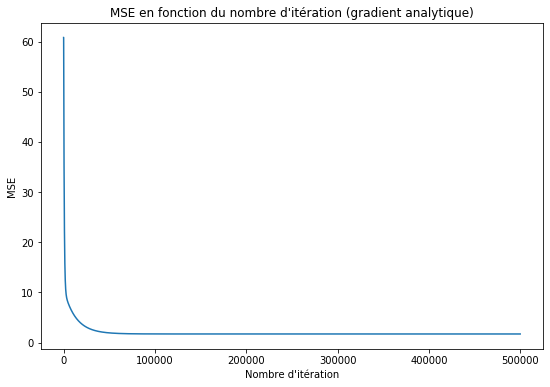

  
--- 0.00010204315185546875 seconds ---


In [21]:
# Hyperparamètres
start_time = time.time()


ALPHA = 0.0001  #  taux d'apprentissage
EPOCHS = 500000  #  number of iterations to perform gradient descent
EPS = 0.4  #  Epsilon
beta_hat = np.zeros(n_var) # parametres initiaux

MSE = np.zeros(EPOCHS+1)
MSE[0] = (np.sum((Y - sum(np.transpose(X*beta_hat)))**2))/n


# Descente du gradient
i = 0
while MSE[i] > EPS and i < EPOCHS:
    i += 1
    # prédiction de Y
    Y_pred = sum(np.transpose(X*beta_hat))

    for j in range(0,n_var):
        beta_hat[j] = beta_hat[j] + ALPHA * (2*np.sum((Y-Y_pred)*X[:,j]))/n

    MSE[i] = (np.sum((Y - Y_pred)**2))/n

print("Iteration finale:",i)
print("MSE par descente du gradient:",MSE[i])

beta_hat = np.dot(np.linalg.inv(np.dot(X.T,X)+0.00001*np.random.rand(n_var, n_var)),np.dot(X.T,Y))

MSE2 = sum((Y - sum(np.transpose(X*beta_hat)))**2)/n
print("MSE par méthode analytique:",MSE2)

# Configuration du plot
x_axis = np.arange(0, i)
plt.figure(figsize=(9,6))
plt.plot(x_axis,MSE[0:i])
plt.title("MSE en fonction du nombre d'itération (gradient analytique)")
plt.xlabel("Nombre d'itération")
plt.ylabel("MSE")
plt.show()
start_time = time.time()

print("  ")
print("--- %s seconds ---" % (time.time() - start_time))

### 2.2. Sur les données aléatoires

In [22]:
n = 1000
p = 5
# Generate fetures, outputs, and true coefficient of 100 samples,
features, output, coef = make_regression(n_samples = n,
                                         # three features
                                         n_features = p,
                                         # where only two features are useful,
                                         n_informative = 2,
                                         # a single target value per observation
                                         n_targets = 1,
                                         # 0.5 standard deviation of the guassian noise
                                         noise = 0.5,
                                         # show the true coefficient used to generated the data
                                         coef = True)
X = features
Y = output
n_var = p

Iteration finale: 25558
MSE par descente du gradient: 0.39994679265014277
MSE par méthode analytique: 0.25095426244630475


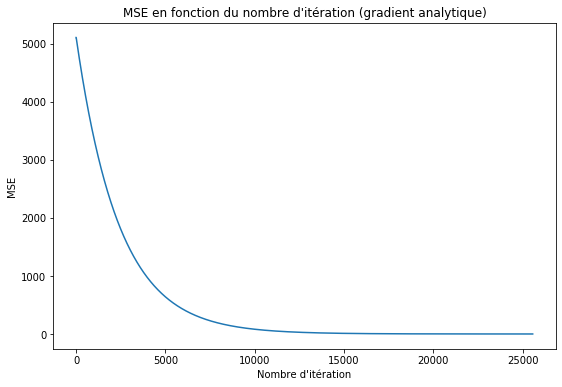

  
--- 2.497313976287842 seconds ---


In [23]:
# Hyperparamètres
start_time = time.time()
ALPHA = 0.0001  #  taux d'apprentissage
EPOCHS = 500000  #  number of iterations to perform gradient descent
EPS = 0.4  #  Epsilon
beta_hat = np.zeros(n_var) # parametres initiaux

MSE = np.zeros(EPOCHS+1)
MSE[0] = (np.sum((Y - sum(np.transpose(X*beta_hat)))**2))/n


# Descente du gradient
i = 0
while MSE[i] > EPS and i < EPOCHS:
    i += 1
    # prédiction de Y
    Y_pred = sum(np.transpose(X*beta_hat))

    for j in range(0,n_var):
        beta_hat[j] = beta_hat[j] + ALPHA * (2*np.sum((Y-Y_pred)*X[:,j]))/n

    MSE[i] = (np.sum((Y - Y_pred)**2))/n

print("Iteration finale:",i)
print("MSE par descente du gradient:",MSE[i])

beta_hat = np.dot(np.linalg.inv(np.dot(X.T,X)+0.00001*np.random.rand(n_var, n_var)),np.dot(X.T,Y))

MSE2 = sum((Y - sum(np.transpose(X*beta_hat)))**2)/n
print("MSE par méthode analytique:",MSE2)

# Configuration du plot
x_axis = np.arange(0, i)
plt.figure(figsize=(9,6))
plt.plot(x_axis,MSE[0:i])
plt.title("MSE en fonction du nombre d'itération (gradient analytique)")
plt.xlabel("Nombre d'itération")
plt.ylabel("MSE")
plt.show()
print("  ")
print("--- %s seconds ---" % (time.time() - start_time))

## 3. Algorithme de descente du gradient - numérique
### 3.1. Sur le jeu de données

In [24]:
X = df[['X0','X1','X2']]
Y = df['Y']
n = df.shape[1]
n_var = df.shape[1]-1
X = X.to_numpy()
Y = Y.to_numpy() # Conversion pour les opérations à venir 

Iteration finale: 500000
MSE par déscente du gradient numérique: 1.7105959246764684


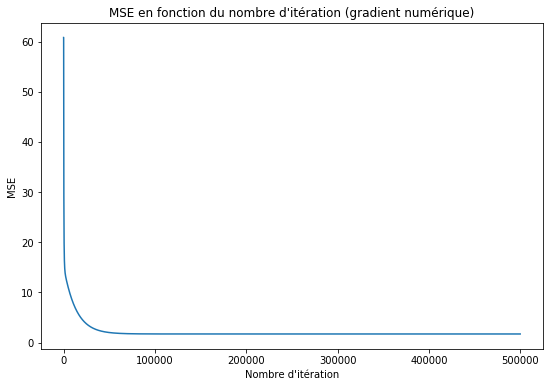

  
--- 46.12900710105896 seconds ---


In [25]:
# Partie Gradient numérique
# Hyperparamètres
start_time = time.time()
D_ALPHA = 0.001
beta_hat = np.zeros(n_var) # parametres initiaux

MSE = np.zeros(EPOCHS+1)
MSE[0] = (np.sum((Y - sum(np.transpose(X*beta_hat)))**2))/n


# Descente du gradient
i = 0
while MSE[i] > EPS and i < EPOCHS:
    i += 1
    # prédiction de Y
    Y_pred = sum(np.transpose(X*beta_hat))

    for j in range(0,n_var):
        mse1 = (np.sum((Y - Y_pred)**2))/n
        beta_hat_temp = beta_hat.copy()
        beta_hat_temp[j] += D_ALPHA
        Y_pred_temp = sum(np.transpose(X*beta_hat_temp))
        mse2 = (np.sum((Y - Y_pred_temp)**2))/n


        beta_hat[j] = beta_hat[j] - ALPHA * (mse2-mse1)/D_ALPHA

    MSE[i] = (np.sum((Y - Y_pred)**2))/n

print("Iteration finale:",i)
print("MSE par déscente du gradient numérique:",MSE[i])

# Configuration du plot
x_axis = np.arange(0, i)
plt.figure(figsize=(9,6))
plt.plot(x_axis,MSE[0:i])
plt.title("MSE en fonction du nombre d'itération (gradient numérique)")
plt.xlabel("Nombre d'itération")
plt.ylabel("MSE")
plt.show()
print("  ")
print("--- %s seconds ---" % (time.time() - start_time))

### 3.2. Sur les données aléatoires

In [26]:
n = 1000
p = 5
# Generate fetures, outputs, and true coefficient of 100 samples,
features, output, coef = make_regression(n_samples = n,
                                         # three features
                                         n_features = p,
                                         # where only two features are useful,
                                         n_informative = 2,
                                         # a single target value per observation
                                         n_targets = 1,
                                         # 0.5 standard deviation of the guassian noise
                                         noise = 0.5,
                                         # show the true coefficient used to generated the data
                                         coef = True)
X = features
Y = output
n_var = p

> L'exécution de cette partie est beaucoup trop longue et n'est donc pas précompilée par choix

Iteration finale: 500000
MSE par déscente du gradient numérique: 5.373156151852034e+64


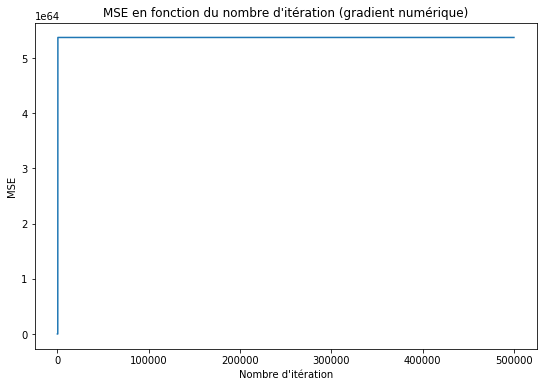

  
--- 153.5204679965973 seconds ---


In [27]:
# Partie Gradient numérique
# Hyperparamètres
start_time = time.time()
D_ALPHA = 0.001
beta_hat = np.zeros(n_var) # parametres initiaux

MSE = np.zeros(EPOCHS+1)
MSE[0] = (np.sum((Y - sum(np.transpose(X*beta_hat)))**2))/n


# Descente du gradient
i = 0
while MSE[i] > EPS and i < EPOCHS:
    i += 1
    # prédiction de Y
    Y_pred = sum(np.transpose(X*beta_hat))

    for j in range(0,n_var):
        mse1 = (np.sum((Y - Y_pred)**2))/n
        beta_hat_temp = beta_hat.copy()
        beta_hat_temp[j] += D_ALPHA
        Y_pred_temp = sum(np.transpose(X*beta_hat_temp))
        mse2 = (np.sum((Y - Y_pred_temp)**2))/n


        beta_hat[j] = beta_hat[j] - ALPHA * (mse2-mse1)/D_ALPHA

    MSE[i] = (np.sum((Y - Y_pred)**2))/n

print("Iteration finale:",i)
print("MSE par déscente du gradient numérique:",MSE[i])

# Configuration du plot
x_axis = np.arange(0, i)
plt.figure(figsize=(9,6))
plt.plot(x_axis,MSE[0:i])
plt.title("MSE en fonction du nombre d'itération (gradient numérique)")
plt.xlabel("Nombre d'itération")
plt.ylabel("MSE")
plt.show()
print("  ")
print("--- %s seconds ---" % (time.time() - start_time))

## 4. Algorithme de descente du gradient - stochastique & explicite
### 4.1. Sur le jeu de données

In [28]:
X = df[['X0','X1','X2']]
Y = df['Y']
n = df.shape[1]
n_var = df.shape[1]-1
X = X.to_numpy()
Y = Y.to_numpy() # Conversion pour les opérations à venir 
import random

Iteration finale: 500000
MSE par descente du gradient: 1.7105950184856005
MSE par méthode analytique: 1.710595016675201


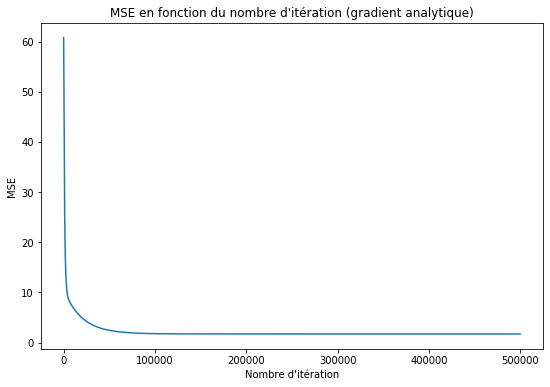

In [29]:
# Hyperparamètres
R = 2 # Nombre de variables à considérer pour le gradient stochastique
ALPHA = 0.0001  #  taux d'apprentissage
EPOCHS = 500000  #  number of iterations to perform gradient descent
EPS = 0.5  #  Epsilon
beta_hat = np.zeros(n_var) # parametres initiaux

MSE = np.zeros(EPOCHS+1)
MSE[0] = (np.sum((Y - sum(np.transpose(X*beta_hat)))**2))/n


# Descente du gradient
i = 0
while MSE[i] > EPS and i < EPOCHS:
    i += 1
    # prédiction de Y
    liste = random.sample(list(np.arange(0, n_var)),R)
    Y_pred = sum(np.transpose(X*beta_hat))

    for j in liste:
        beta_hat[j] = beta_hat[j] + ALPHA * (2*np.sum((Y-Y_pred)*X[:,j]))/n

    MSE[i] = (np.sum((Y - Y_pred)**2))/n

print("Iteration finale:",i)
print("MSE par descente du gradient:",MSE[i])

beta_hat = np.dot(np.linalg.inv(np.dot(X.T,X)+0.00001*np.random.rand(n_var, n_var)),np.dot(X.T,Y))

MSE2 = sum((Y - sum(np.transpose(X*beta_hat)))**2)/n
print("MSE par méthode analytique:",MSE2)

# Configuration du plot
x_axis = np.arange(0, i)
plt.figure(figsize=(9,6))
plt.plot(x_axis,MSE[0:i])
plt.title("MSE en fonction du nombre d'itération (gradient analytique)")
plt.xlabel("Nombre d'itération")
plt.ylabel("MSE")
plt.show()

### 4.2. Sur les données aléatoires

In [30]:
n = 1000
p = 5
# Generate fetures, outputs, and true coefficient of 100 samples,
features, output, coef = make_regression(n_samples = n,
                                         # three features
                                         n_features = p,
                                         # where only two features are useful,
                                         n_informative = 2,
                                         # a single target value per observation
                                         n_targets = 1,
                                         # 0.5 standard deviation of the guassian noise
                                         noise = 0.5,
                                         # show the true coefficient used to generated the data
                                         coef = True)
X = features
Y = output
n_var = p
import random

Iteration finale: 60992
MSE par descente du gradient: 0.49990887100602843
MSE par méthode analytique: 0.23442528373402358


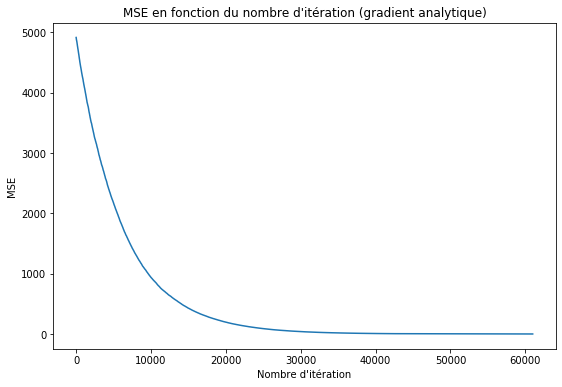

  
--- 4.448782682418823 seconds ---


In [31]:
# Hyperparamètres
start_time = time.time()
R = 2 # Nombre de variables à considérer pour le gradient stochastique
ALPHA = 0.0001  #  taux d'apprentissage
EPOCHS = 500000  #  number of iterations to perform gradient descent
EPS = 0.5  #  Epsilon
beta_hat = np.zeros(n_var) # parametres initiaux

MSE = np.zeros(EPOCHS+1)
MSE[0] = (np.sum((Y - sum(np.transpose(X*beta_hat)))**2))/n


# Descente du gradient
i = 0
while MSE[i] > EPS and i < EPOCHS:
    i += 1
    # prédiction de Y
    liste = random.sample(list(np.arange(0, n_var)),R)
    Y_pred = sum(np.transpose(X*beta_hat))

    for j in liste:
        beta_hat[j] = beta_hat[j] + ALPHA * (2*np.sum((Y-Y_pred)*X[:,j]))/n

    MSE[i] = (np.sum((Y - Y_pred)**2))/n

print("Iteration finale:",i)
print("MSE par descente du gradient:",MSE[i])

beta_hat = np.dot(np.linalg.inv(np.dot(X.T,X)+0.00001*np.random.rand(n_var, n_var)),np.dot(X.T,Y))

MSE2 = sum((Y - sum(np.transpose(X*beta_hat)))**2)/n
print("MSE par méthode analytique:",MSE2)

# Configuration du plot
x_axis = np.arange(0, i)
plt.figure(figsize=(9,6))
plt.plot(x_axis,MSE[0:i])
plt.title("MSE en fonction du nombre d'itération (gradient analytique)")
plt.xlabel("Nombre d'itération")
plt.ylabel("MSE")
plt.show()
print("  ")
print("--- %s seconds ---" % (time.time() - start_time))

## 5. Algorithme de descente du gradient - stochastique & numérique
### 5.1. Sur le jeu de données

In [32]:
X = df[['X0','X1','X2']]
Y = df['Y']
n = df.shape[1]
n_var = df.shape[1]-1
X = X.to_numpy()
Y = Y.to_numpy() # Conversion pour les opérations à venir 
import random

Iteration finale: 500000
MSE par descente du gradient numérique: 1.7106853171181455


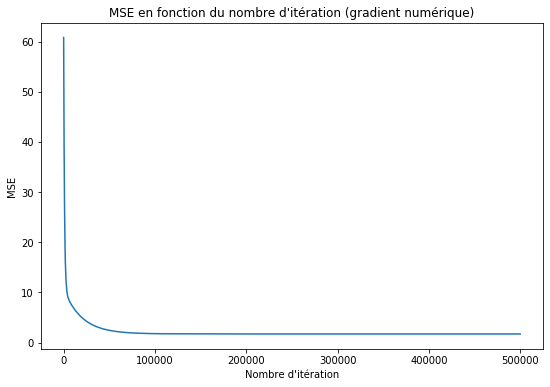

In [33]:
# Partie Gradient numérique
# Hyperparamètres
start_time = time.time()
D_ALPHA = 0.01
beta_hat = np.zeros(n_var) # parametres initiaux

MSE = np.zeros(EPOCHS+1)
MSE[0] = (np.sum((Y - sum(np.transpose(X*beta_hat)))**2))/n


# Descente du gradient
i = 0
while MSE[i] > EPS and i < EPOCHS:
    i += 1
    # prédiction de Y
    liste = random.sample(list(np.arange(0, n_var)),R)
    Y_pred = sum(np.transpose(X*beta_hat))

    for j in liste:
        mse1 = (np.sum((Y - Y_pred)**2))/n
        beta_hat_temp = beta_hat.copy()
        beta_hat_temp[j] += D_ALPHA
        Y_pred_temp = sum(np.transpose(X*beta_hat_temp))
        mse2 = (np.sum((Y - Y_pred_temp)**2))/n


        beta_hat[j] = beta_hat[j] - ALPHA * (mse2-mse1)/D_ALPHA

    MSE[i] = (np.sum((Y - Y_pred)**2))/n

print("Iteration finale:",i)
print("MSE par descente du gradient numérique:",MSE[i])

# Configuration du plot
x_axis = np.arange(0, i)
plt.figure(figsize=(9,6))
plt.plot(x_axis,MSE[0:i])
plt.title("MSE en fonction du nombre d'itération (gradient numérique)")
plt.xlabel("Nombre d'itération")
plt.ylabel("MSE")
plt.show()

###  5.2. Sur le jeu de données aléatoires

In [34]:
n = 1000
p = 5
# Generate fetures, outputs, and true coefficient of 100 samples,
features, output, coef = make_regression(n_samples = n,
                                         # three features
                                         n_features = p,
                                         # where only two features are useful,
                                         n_informative = 2,
                                         # a single target value per observation
                                         n_targets = 1,
                                         # 0.5 standard deviation of the guassian noise
                                         noise = 0.5,
                                         # show the true coefficient used to generated the data
                                         coef = True)
X = features
Y = output
n_var = p
import random

Iteration finale: 65007
MSE par descente du gradient numérique: 0.49998559178398805


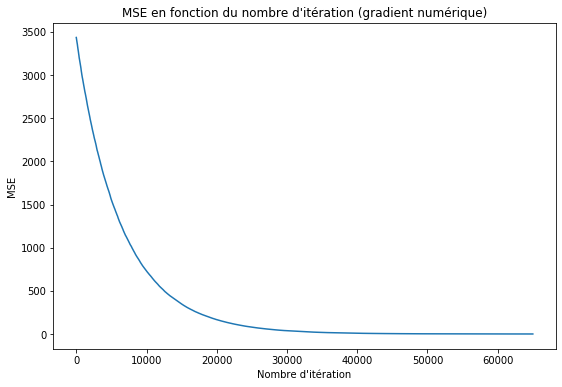

  
--- 10.132713079452515 seconds ---


In [35]:
# Partie Gradient numérique
# Hyperparamètres
start_time = time.time()
D_ALPHA = 0.01
beta_hat = np.zeros(n_var) # parametres initiaux

MSE = np.zeros(EPOCHS+1)
MSE[0] = (np.sum((Y - sum(np.transpose(X*beta_hat)))**2))/n


# Descente du gradient
i = 0
while MSE[i] > EPS and i < EPOCHS:
    i += 1
    # prédiction de Y
    liste = random.sample(list(np.arange(0, n_var)),R)
    Y_pred = sum(np.transpose(X*beta_hat))

    for j in liste:
        mse1 = (np.sum((Y - Y_pred)**2))/n
        beta_hat_temp = beta_hat.copy()
        beta_hat_temp[j] += D_ALPHA
        Y_pred_temp = sum(np.transpose(X*beta_hat_temp))
        mse2 = (np.sum((Y - Y_pred_temp)**2))/n


        beta_hat[j] = beta_hat[j] - ALPHA * (mse2-mse1)/D_ALPHA

    MSE[i] = (np.sum((Y - Y_pred)**2))/n

print("Iteration finale:",i)
print("MSE par descente du gradient numérique:",MSE[i])

# Configuration du plot
x_axis = np.arange(0, i)
plt.figure(figsize=(9,6))
plt.plot(x_axis,MSE[0:i])
plt.title("MSE en fonction du nombre d'itération (gradient numérique)")
plt.xlabel("Nombre d'itération")
plt.ylabel("MSE")
plt.show()
print("  ")
print("--- %s seconds ---" % (time.time() - start_time))

---------------------------------------

## Some random thoughts we found relevant on this problem : data insights, ideas, other types of calculus 

In [36]:
import pandas as pd

df = pd.read_excel (r'data_regression.xlsx')
print (df)

   X0    X1    X2     Y
0   1  0.72  0.32  6.93
1   1  0.75  0.12  5.99
2   1  0.53  0.65  1.46
3   1  0.27  0.82  1.44
4   1  0.49  0.15  4.51
5   1  0.02  0.19  1.25
6   1  0.35  0.87  2.53
7   1  0.99  0.71  6.88
8   1  0.98  0.92  6.25
9   1  0.73  0.19  6.36


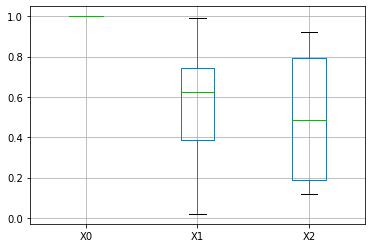

In [37]:
%matplotlib inline  

boxplot = df.boxplot(column=['X0', 'X1','X2'])

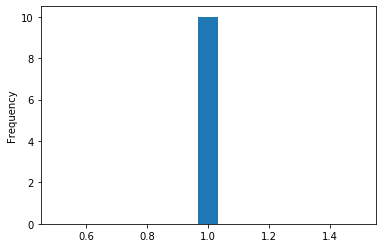

In [38]:
df.X0.plot.hist(bins=15)

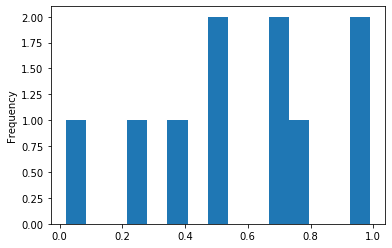

In [39]:
df.X1.plot.hist(bins=15)

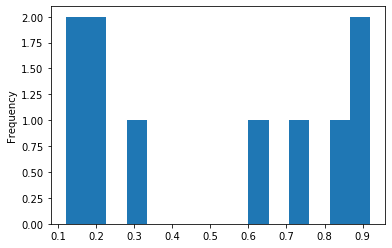

In [40]:
df.X2.plot.hist(bins=15)

#### According to the dataset using a scaler is useless

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
X0    10 non-null int64
X1    10 non-null float64
X2    10 non-null float64
Y     10 non-null float64
dtypes: float64(3), int64(1)
memory usage: 400.0 bytes


In [42]:
df.describe()

,X0,X1,X2,Y
count,10.0,10.000000,10.000000,10.000000
mean,1.0,0.583000,0.494000,4.360000
std,0.0,0.311307,0.328877,2.430459
min,1.0,0.020000,0.120000,1.250000
25%,1.0,0.385000,0.190000,1.727500
50%,1.0,0.625000,0.485000,5.250000
75%,1.0,0.745000,0.792500,6.332500
max,1.0,0.990000,0.920000,6.930000


In [43]:
df.shape

(10, 4)

In [44]:
df.head()

,X0,X1,X2,Y
0,1,0.72,0.32,6.93
1,1,0.75,0.12,5.99
2,1,0.53,0.65,1.46
3,1,0.27,0.82,1.44
4,1,0.49,0.15,4.51


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Looking at the data

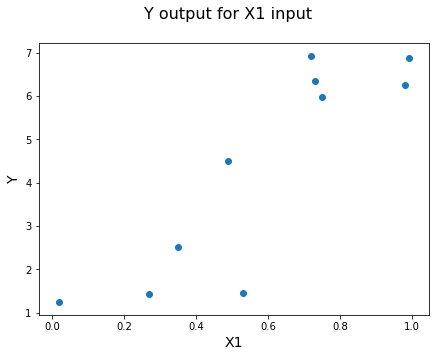

In [46]:
fig = plt.figure(figsize=(7, 5))
fig.suptitle('Y output for X1 input', fontsize=16)
plt.scatter(df['X1'], df['Y'])
plt.xlabel('X1', fontsize=14)
plt.ylabel('Y', fontsize=14)
plt.show()

In [47]:
df.corr()

,X0,X1,X2,Y
X0,NaN,NaN,NaN,NaN
X1,NaN,1.000000,0.142473,0.870142
X2,NaN,0.142473,1.000000,-0.210442
Y,NaN,0.870142,-0.210442,1.000000


In [48]:
# Correlation matrix
corr = df.corr()

# color it
corr.style.background_gradient(cmap='coolwarm')

/Users/pel_btc_coding/.local/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,X0,X1,X2,Y
X0,nan,nan,nan,nan
X1,nan,1,0.142473,0.870142
X2,nan,0.142473,1,-0.210442
Y,nan,0.870142,-0.210442,1


### X1 , X2 , X3 have a really low correlation 

### We can see that a Lasso would only consider X1 

## Data vizualisation 

/Users/pel_btc_coding/.local/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


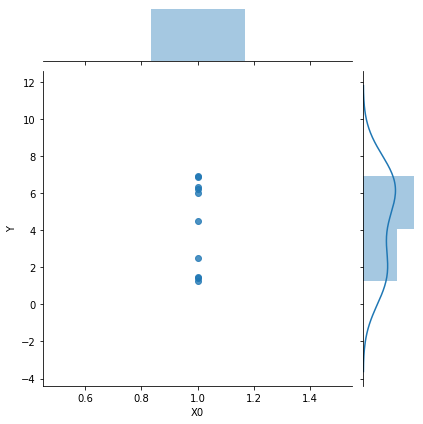

In [49]:
sns.jointplot(x=df['X0'], y=df['Y'], data=df, kind='reg')

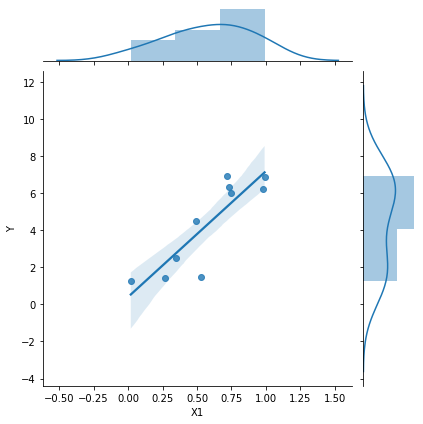

In [50]:
sns.jointplot(x=df['X1'], y=df['Y'], data=df, kind='reg')

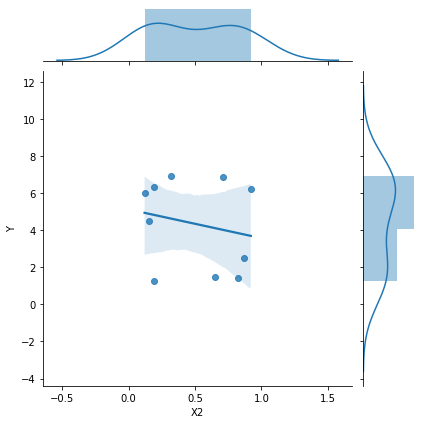

In [51]:
sns.jointplot(x=df['X2'], y=df['Y'], data=df, kind='reg')

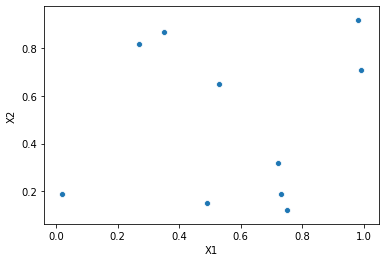

In [52]:
import seaborn as sns

sns.scatterplot('X1','X2', data=df)

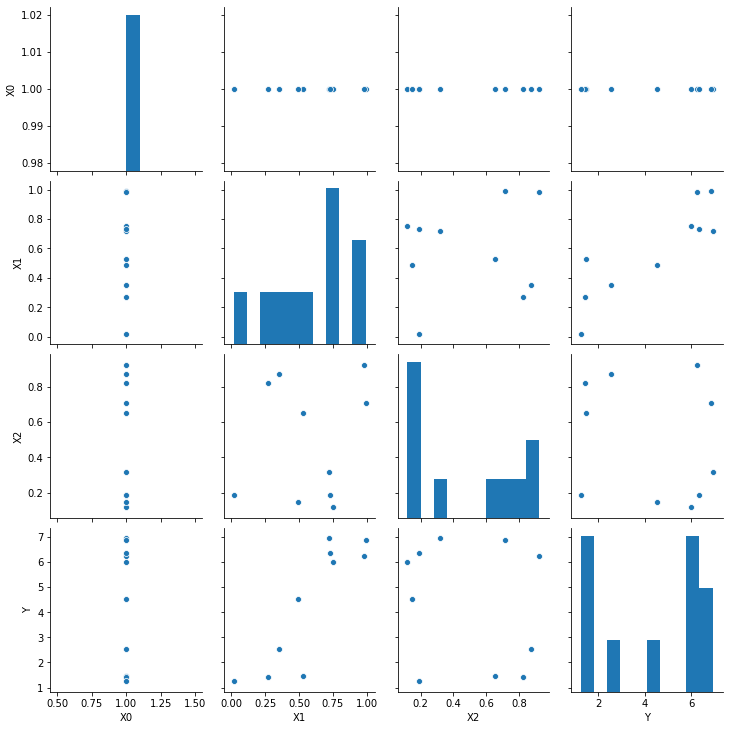

In [53]:
# Pair plots
sns.pairplot(data=df)

### tough to find a pattern cause I don't have enough data, but still can find some symetries

## Multi linear regression 

Our regression equation, then, instead of looking like $\hat{y} = mx + b$, will now look like:

$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$

## Splitting Data into Training and Testing Sets

In [54]:
df.columns

Index(['X0', 'X1', 'X2', 'Y'], dtype='object')

In [55]:
# Putting feature variable to X

X = df[['X0', 'X1', 'X2']]

In [56]:
# Putting response variable to y

y = df['Y']

In [57]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 ,test_size = 0.2, random_state=100)

In [58]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
fitting = sm.OLS(y_train,X_train).fit()

/Users/pel_btc_coding/.local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [59]:
#Let's see the summary of our first linear model
print(fitting.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     16.11
Date:                Wed, 03 Jun 2020   Prob (F-statistic):            0.00661
Time:                        00:47:39   Log-Likelihood:                -10.086
No. Observations:                   8   AIC:                             26.17
Df Residuals:                       5   BIC:                             26.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0             1.4007      0.936      1.497      0.1

/Users/pel_btc_coding/.local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


### Result are satisfying knowing the dataset and the correlation between variable 

In [60]:
# Prediction for fun
fitting.predict([[1,12,4]])

array([78.27170682])

### We can not do MSE cause the data set is too samll (doesn't make a lot of sens)

## More classic linear regression 

In [61]:
from sklearn.linear_model import LinearRegression

# Instanciate Linear model
model = LinearRegression()

# Train Linear Model
model.fit(df[['X0', "X1", "X2"]], df['Y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# Access the model's inner parameters slope(coef_) and intercept(intercept_)
slope_a, intercept_b = model.coef_, model.intercept_ 

print(slope_a)
print(intercept_b)

[ 0.          7.17311794 -2.52258683]
1.4242301343712214


## linear combination of initial dataset columns

## 𝑌 = 𝛽 + 𝛽0𝑋0 + 𝛽1𝑋1 + 𝛽2𝑋2 , with the model above we can get all 𝛽i 

- 𝛽 = 1.42
- 𝛽0 = 0
- 𝛽1 = 7.17
- 𝛽2 = -2.25

- 𝛽0 is not taking into account, it is like an outilier for the model. Which is coherent when looking at the dataset

### Another way to implement the multi linear regression 

In [63]:
# Prepare X and y
X = df[['X0', "X1", "X2"]]
y = df['Y']

# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Import the model
from sklearn.linear_model import LinearRegression

# Instanciate the model
model = LinearRegression()

# Train the model on the Training data
model.fit(X_train, y_train)

# Score the model on the Testing data
model.score(X_test,y_test)

0.6356585670220383

### Visualization for X1 (cause it is the more relevant input)

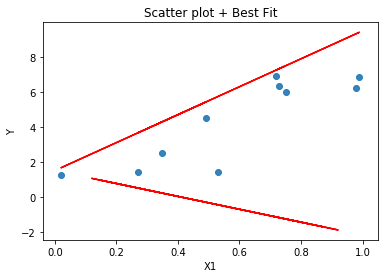

In [64]:
# Access the model attributes w(coef_) and b(intercept_)
w, b = model.coef_, model.intercept_ 

# Defining the line of best fit equation
best_fit = w * X + b

# Plot!
import matplotlib.pyplot as plt
plt.scatter(X.X1, y, alpha=0.9)
plt.plot(X, best_fit, c="red")
plt.title('Scatter plot + Best Fit')
plt.xlabel('X1')
plt.ylabel('Y')
plt.show()

### Testing other types of regressions 

In [65]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
linreg = LinearRegression().fit(X, y)
ridge = Ridge(alpha=100).fit(X, y)
lasso = Lasso(alpha=100).fit(X, y)

pd.DataFrame({
    "coef_linreg": pd.Series(linreg.coef_, index = X.columns),
    "coef_ridge": pd.Series(ridge.coef_, index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_, index= X.columns),
})

,coef_linreg,coef_ridge,coef_lasso
X0,0.000000,0.000000,0.0
X1,7.173118,0.058760,0.0
X2,-2.522587,-0.015069,-0.0


### Results are not commun due to the dataset distribution, Lasso, Ridge or Elastic Net can not be used

### End of Jupiter 